# Getting Population data

This page demonstrates the use of the population class.
This class helps getting data about the demography in different areas.

For example, we will use it to get data about the population in Tel Aviv.
When using it, we have to deliver either a shapely polygon to use or a string.
The string may be a name of a saved Geometry in the database or a name used
as a CutName when cutting an area for a new document.
In this example, we already have a document whose CutName is "TelAviv" in the database.

total_pop


,index,geometry,areaFraction,total_pop
0,2001,"POLYGON ((180519.382 667804.806, 180488.194 66...",0.307101,1812.815870
1,2002,"POLYGON ((180529.452 667735.310, 180532.092 66...",1.000000,5323.000000
2,2003,"POLYGON ((179568.099 668000.000, 179515.332 66...",0.158529,934.051310
3,2011,"POLYGON ((180785.630 668000.000, 180744.244 66...",0.093554,456.451884
4,2012,"POLYGON ((180693.512 667770.056, 180693.272 66...",0.190037,1001.875425
5,2038,"POLYGON ((183000.000 667881.890, 182946.436 66...",0.037327,100.448238
6,2048,"POLYGON ((178971.756 666604.498, 178919.262 66...",1.000000,2417.000000
7,2049,"POLYGON ((179223.249 667019.323, 179222.949 66...",1.000000,2015.000000
8,2050,"POLYGON ((179666.573 667070.029, 179666.683 66...",1.000000,4299.000000
9,2051,"POLYGON ((179603.166 666518.382, 179602.897 66...",1.000000,3914.000000


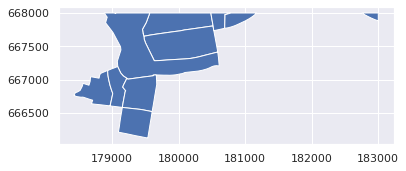

In [6]:
from hera import GIS
population = GIS.population(projectName="Examples") 
data = population.projectPolygonOnPopulation(Geometry="TelAviv")
data.reset_index()[:10].plot()
data.reset_index()[:10]

As can be seen, the data is a geopandas of polygons.
For each polygon, the amount of population in it is detailed.
As can be seen, some of the polygons are cut, beacuse a part of them is outside the desired region.
The fraction of their area within the region from their total area is given in the column areaFraction.
The amount of population is the total amount of population in each polygon times its fraction.

The values we get in these example represent the whole populations.
One can find information on specific types of population.
To find out which types are available, we can use this line:

In [7]:
population.agesDefinition

{'All': 'total_pop',
 'Children': 'AGE_0_14',
 'Youth': 'AGE_15_19',
 'YoungAdults': 'age_20_29',
 'Adults': 'age_30_64',
 'Elderly': 'AGE_65_up'}

Then, when we can deliver a specific type or a list of types to the function.
If we are intersted in population in ages of under 14 or above 65, we may find it like this:

In [8]:
data = population.projectPolygonOnPopulation(Geometry="TelAviv", populationTypes=["Children","Elderly"])
data.reset_index()[:10]

AGE_0_14
AGE_65_up


,index,geometry,areaFraction,AGE_0_14,AGE_65_up
0,2001,"POLYGON ((180519.382 667804.806, 180488.194 66...",0.307101,379.269456,389.096681
1,2002,"POLYGON ((180529.452 667735.310, 180532.092 66...",1.000000,1197.000000,1046.000000
2,2003,"POLYGON ((179568.099 668000.000, 179515.332 66...",0.158529,211.635862,193.246529
3,2011,"POLYGON ((180785.630 668000.000, 180744.244 66...",0.093554,80.550332,96.735242
4,2012,"POLYGON ((180693.512 667770.056, 180693.272 66...",0.190037,130.365429,96.918905
5,2038,"POLYGON ((183000.000 667881.890, 182946.436 66...",0.037327,21.351316,17.431931
6,2048,"POLYGON ((178971.756 666604.498, 178919.262 66...",1.000000,338.000000,344.000000
7,2049,"POLYGON ((179223.249 667019.323, 179222.949 66...",1.000000,284.000000,238.000000
8,2050,"POLYGON ((179666.573 667070.029, 179666.683 66...",1.000000,657.000000,611.000000
9,2051,"POLYGON ((179603.166 666518.382, 179602.897 66...",1.000000,456.000000,489.000000


If one desires to use one's own data instead of the public data, 
one can deliver a geopandas dataframe of data to the function.
The populationTypes should be name/s of column/s from the data.
For example:

In [9]:
#dataframe = some geopandas dataframe
#populationType = some column name
#data = population.projectPolygonOnPopulation(Geometry="TelAviv", data=dataframe, populationTypes=populationType)